### 1

We know that the Bayes risk of the OLS problem is σ². We have:

$$
\frac{n - d}{n}σ² < σ²
$$

This shows that the value in Proposition 1 underestimates the risk, since the bayes risk is the ideal risk. We also see that the more d is close to n, the smaller this evaluation will be, meaning that with a dimensionality too high the model will overfit.

### 2

We have the following equations:
$$
\hat\theta = (X^TX)^{-1}X^Ty \\
y = X\theta^* + \epsilon 
$$

Which gives us:
$$
\begin{aligned}
\hat\theta &= (X^TX)^{-1}X^T X\theta^* + (X^TX)^{-1}X^T \epsilon \\
\hat\theta &=  \theta^*+ (X^TX)^{-1}X^T \epsilon 
\end{aligned}
$$

We can then replace y and θ in the equation 4:

$$
\begin{aligned}
E[R_n(\hat\theta)] &= E[\frac1n ||X\theta^* + \epsilon - X(\theta^*+ (X^TX)^{-1}X^T \epsilon)||²] \\
E[R_n(\hat\theta)] &= E[\frac1n ||X(\theta^* - \theta^* - (X^TX)^{-1}X^T \epsilon) + \epsilon||²] \\
E[R_n(\hat\theta)] &= E[\frac1n || \epsilon - X(X^TX)^{-1}X^T\epsilon||²] \\
E[R_n(\hat\theta)] &= E[\frac1n ||(I_n - X(X^TX)^{-1}X^T) \epsilon||²] 
\end{aligned}
$$


### 3

When multiplying a matrix with it's transpose, we end up on the diagonal with the sum of the terms on the line squared. This means that when taking the sum of these, we obtain the sum of all the terms squared, as shown in the equation 10.

### 4 

We start from the definition of the squared norm:

$$
\|A \varepsilon\|^2 = (A \varepsilon)^\top (A \varepsilon) = \varepsilon^\top A^\top A \varepsilon
$$


This shows that:

$$
\begin{aligned}
\mathbb{E}_\varepsilon \left[ \frac{1}{n} \| A \varepsilon \|^2 \right] 
&= \frac{1}{n} \mathbb{E}_\varepsilon \left[ \varepsilon^\top A^\top A \varepsilon \right] \\
&= \frac{1}{n} \sigma^2 \operatorname{tr}(A^TA)
\end{aligned}
$$

### 5

Since $A = I_n - P$, we have:

$$
\begin{aligned}
A^T A &= (I_n - P)^T (I_n - P) \\
&= (I_n^T - P^T) (I_n - P) \\
&= (I_n - P) (I_n - P) \quad \text{(since $P$ is symmetric)} \\
&= I_n \cdot I_n - I_n \cdot P - P \cdot I_n + P \cdot P \\
&= I_n - 2P + P^2 \\
&= I_n - 2P + P \quad \text{(since $P$ is idempotent)} \\
&= I_n - P \\
&= A
\end{aligned}
$$

### 6
$$
\begin{aligned}
E[R_n(\hat\theta)] &= \frac{\sigma^2}{n} \operatorname{tr}(A^TA) \\
&= \frac{\sigma^2}{n} \operatorname{tr}(A) \\
&= \frac{\sigma^2}{n} (\operatorname{tr}(I_n) - \operatorname{tr}(X(X^TX)^{-1}X^T)) \\
&= \frac{\sigma^2}{n} (n - \operatorname{tr}(X(X^TX)^{-1}X^T))
\end{aligned}
$$

and since $X(X^TX)^{-1}X^T$ is a projection, $\operatorname{tr}(X(X^TX)^{-1}X^T)$ = d

We end up back on the equation 8, proving it.

### 7

We want : 
$$
E\left[ \frac{\|y - X\hat{\theta}\|^2}{n - d} \right].
$$

We use the numerator & the empirical risk, $R_n(\hat{\theta})$, its definition is:
$$
R_n(\hat{\theta}) = \frac{1}{n} \|y - X\hat{\theta}\|^2.
$$
So : 
$$
\|y - X\hat{\theta}\|^2 = n \cdot R_n(\hat{\theta}).
$$

So we have :
$$
E\left[ \frac{n \cdot R_n(\hat{\theta})}{n - d} \right].
$$

We have :
$$
\frac{n}{n - d} E[R_n(\hat{\theta})].
$$

We know that $E[R_n(\hat{\theta})]$:
$$
E[R_n(\hat{\theta})] = \frac{n - d}{n} \sigma^2.
$$

So :
$$
\frac{n}{n - d} \cdot \left( \frac{n - d}{n} \sigma^2 \right) = \sigma^2.
$$

So $\frac{\|y - X\hat{\theta}\|^2}{n - d}$ is an unbiased estimator of the noise variance $\sigma^2$.

### 8

Running simulation with 1000 repetitions...


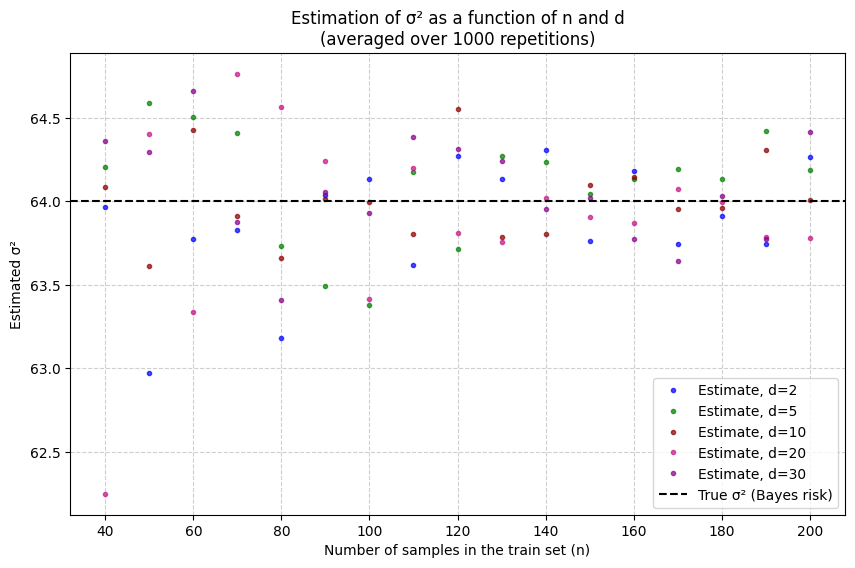

In [1]:
import numpy as np
import matplotlib.pyplot as plt

sigma = 8
bayes_risk = sigma ** 2

def generate_output_data(
    X: np.ndarray, theta_star: np.ndarray, sigma: float, rng, n_repetitions: int
) -> np.ndarray:
    n = X.shape[0]
    noise = rng.normal(0, sigma, size=(n, n_repetitions))
    y = X @ theta_star + noise
    return y

def OLS_estimator(X: np.ndarray, y: np.ndarray) -> np.ndarray:
    covariance_matrix = X.T @ X
    inverse_covariance = np.linalg.inv(covariance_matrix)
    theta_hat = inverse_covariance @ (X.T @ y)
    return theta_hat


def estimate_sigma_squared(
    n_train: int,
    d: int,
    n_repetitions: int,
):

    rng = np.random.default_rng()
    X = rng.uniform(low=0, high=1, size=(n_train, d))
    theta_star = rng.uniform(low=0, high=1, size=(d, 1))

    y_train = generate_output_data(
        X=X,
        theta_star=theta_star,
        sigma=sigma,
        rng=rng,
        n_repetitions=n_repetitions,
    )

    theta_hat = OLS_estimator(
        X=X,
        y=y_train,
    )


    y_pred = X @ theta_hat


    sum_of_squared_residuals = np.linalg.norm(y_pred - y_train) ** 2
    
    mean_estimated_variance = (sum_of_squared_residuals / (n_train - d)) / n_repetitions

    return mean_estimated_variance

def plot_sigma_estimates(
    estimates: dict[int, float],
    n_list: list[int],
    d_list: list[int],
    true_sigma_squared: float,
    n_repetitions: int,
):
    colors = ["blue", "green", "darkred", "mediumvioletred", "darkmagenta"]
    plt.figure(figsize=(10, 6))

    for index, d in enumerate(d_list):
        color = colors[index]
        estimated_values = [estimates[n, d] for n in n_list]
        plt.plot(
            n_list,
            estimated_values,
            "o",
            label=f"Estimate, d={d}",
            color=color,
            markersize=3,
            alpha=0.7,
        )

    plt.axhline(
        y=true_sigma_squared,
        label="True σ² (Bayes risk)",
        color="black",
        linestyle="--",
    )

    plt.xlabel("Number of samples in the train set (n)")
    plt.ylabel("Estimated σ²")
    plt.title(f"Estimation of σ² as a function of n and d\n(averaged over {n_repetitions} repetitions)")
    plt.legend(loc="best")
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

if True:
    n_train_list = list(range(40, 201, 10))
    d_list = [2, 5, 10, 20, 30]
    n_repetitions = 1000

    estimated_variances = dict()
    print(f"Running simulation with {n_repetitions} repetitions...")
    for n_train in n_train_list:
        for d in d_list:
            if n_train > d:
                estimated_variances[(n_train, d)] = estimate_sigma_squared(
                    n_train=n_train,
                    d=d,
                    n_repetitions=n_repetitions,
                )

    plot_sigma_estimates(
        estimates=estimated_variances,
        n_list=n_train_list,
        d_list=d_list,
        true_sigma_squared=bayes_risk,
        n_repetitions=n_repetitions,
    )